<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/ModelTraining_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

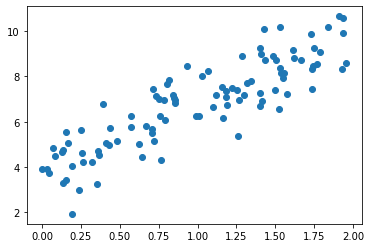

In [1]:
#Model Training

#정규방정식 증명
#theta_hat = (X.T X)^-1 X.T Y 
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100 ,1)
y = 4 + 3 * X + np.random.randn(100, 1) # 기대 파라미터 : 4, 3
plt.plot(X, y, 'o')

In [2]:
#정규방정식을 통한 theta 계산
X_b = np.c_[np.ones((100, 1)), X] #샘플에 x0 = 1 을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)
#random.randn 가우시안 noise 때문에 정확한 예측은 안됌

[[3.88716772]
 [2.93341231]]


[[3.88716772]
 [9.75399235]]


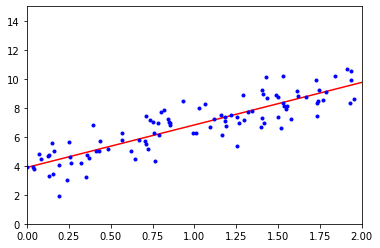

In [3]:
X_new = np.array([[0], [2]])
X_new_b =  np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
#사이킷런의 선형 회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

#LinearRegression -> 최소 제곱을 기반으로함
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

#theta_hat = X^+ y 를 계산한다. X^+ 는 유사역행렬(무어-펜로즈 역행렬)
print(np.linalg.pinv(X_b).dot(y))

[3.88716772] [[2.93341231]]
[[3.88716772]
 [9.75399235]]
[[3.88716772]
 [2.93341231]]
[[3.88716772]
 [2.93341231]]


[[3.88716772]
 [2.93341231]]


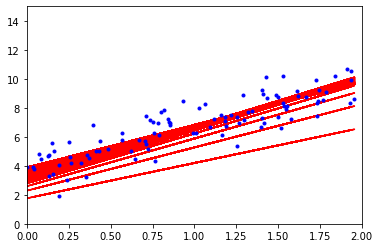

In [5]:
#경사 하강법
eta = 0.1 #0.02 #0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta * gradients
    plt.plot(X, X_b.dot(theta), 'r-')
print(theta)

plt.plot(X,y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
#SGD 학습 스케쥴 적용하기
n_epochs = 50
t0, t1 = 5, 50 #학습 스케쥴

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.88677888]
 [2.93916115]]


In [7]:
#sklearn의 SGDRegressor 사용해보기
#SGDRegressor eta(t) = eta0 / t ** power_t  (default t = 0.01, power_t = 0.25)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.84577869] [2.91076503]


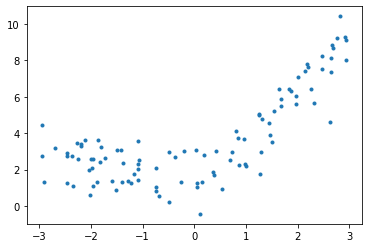

In [34]:
#다항 회귀
m = 100
X = 6 * np.random.rand(m, 1) - 3 #-3 ~ 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, '.')

In [35]:
#훈련세트(X) 의 각 특성을 제곱하여 새로운 특성으로 추가한다.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
#Polynomial Features 같은경우 팩토리얼의 수준으로 늘어난다. degree = d, features = n : n개의 특성을 0 ~ d 개를 뽑을 수 있는 중복조합의 수

[1.63527275]
[1.63527275 2.67411698]


[2.02487789] [[0.95866104 0.51368766]]


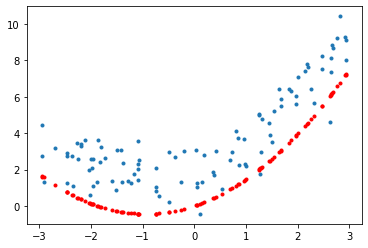

In [62]:
#데이터셋을 변화시켜 선형 회귀로 비선형 데이터셋을 훈련시킨다.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
plt.plot(X, y, '.')
plt.plot(X, X_poly.dot(lin_reg.coef_.T), 'r.')